In [1]:
import os  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

In [32]:
def sigmoid(z):
	# WRITEME: write your code here to complete the routine
    return 1/(1+(np.e)**(-z))

In [33]:
def regress(X_feat, theta):
    # WRITEME: write your code here to complete the routine
    Theta = np.concatenate((theta[0],theta[1].T),axis = 0)
    Linear = np.dot(X_feat, Theta)
    return sigmoid(Linear)

In [34]:
def predict(X_feat, theta):  
	# WRITEME: write your code here to complete the routine
    Reg = regress(X_feat, theta)
    return (Reg>1/2).astype(int)

In [35]:
def computeCost(X, y, theta, beta): # loss is now Bernoulli cross-entropy/log likelihood
    # WRITEME: write your code here to complete the routine
    f_theta_X = regress(X,theta)
    m = X.shape[0]
    return (1/(2*m))*(-y*np.log(f_theta_X)-(1-y)*np.log(1-f_theta_X)).sum()+beta/(2*m)*(theta[1]**2).sum()

In [36]:
def computeGrad(X, y, theta, beta): 
    # WRITEME: write your code here to complete the routine (
    # NOTE: you do not have to use the partial derivative symbols below, they are there to guide your thinking)
    m = (X.shape)[0]
    Reg = regress(X,theta)
    dL_db = (1/(2*m))*(np.sum(Reg-y)) 
    dL_db = dL_db.reshape(1,1) # derivative w.r.t model bias b
    n = (theta[1].shape)[1]
    dL_dw = (1/(2*m))*np.array([np.sum((Reg-y)*X[:,j+1].reshape(m,1))+beta*theta[1][0,j] for j in range(0,n)]) 
    dL_dw = dL_dw.reshape(1,n) # derivative w.r.t. model weights w
    nabla = (dL_db, dL_dw) # nabla represents the full gradient
    return nabla

In [53]:
# NOTE: you will need to tinker with the meta-parameters below yourself (do not think of them as defaults by any means)
# meta-parameters for program
trial_name = 'p6_reg0' # will add a unique sub-string to output of this program
degree = 6 # p, degree of model (LEAVE THIS FIXED TO p = 6 FOR THIS PROBLEM)
beta = 10 # regularization coefficient
alpha = 0.5 # step size coefficient
n_epoch = 5000 # number of epochs (full passes through the dataset)
eps = 1.0e-9  # controls convergence criterion

In [54]:
path = os.getcwd() + '/data/prob3.dat'  
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])

positive = data2[data2['Accepted'].isin([1])]  
negative = data2[data2['Accepted'].isin([0])]
 
x1 = data2['Test 1']  
x2 = data2['Test 2']

In [55]:
# apply feature map to input features x1 and x2
cnt = 0
for i in range(1, degree+1):  
	for j in range(0, i+1):
		data2['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
		cnt += 1

data2.drop('Test 1', axis=1, inplace=True)  
data2.drop('Test 2', axis=1, inplace=True)

In [56]:
# set X and y
cols = data2.shape[1]  
X2 = data2.iloc[:,1:cols]  
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
m = X2.shape[0]
X2 = np.concatenate((np.ones((m,1)),X2),axis = 1)
y2 = np.array(y2.values)
b = np.array([0]).reshape(1,1)
w = np.zeros((1,X2.shape[1]-1))
theta = (b, w)

In [57]:
L = computeCost(X2, y2, theta, beta)
print("-1 L = {0}".format(L))
i = 0
while(i < n_epoch):
    dL_db, dL_dw = computeGrad(X2, y2, theta, beta)
    #print(theta)
    b = theta[0]
    w = theta[1]
    #print(dL_db)
    #print(dL_dw)
    # update rules go here...
    # WRITEME: write your code here to perform a step of gradient descent & record anything else desired for later
    b = b - alpha*dL_db
    w = w - alpha*dL_dw
    theta = (b, w)
    
    # WRITEME: write code to perform a check for convergence (or simply to halt early)
    if (abs(L-computeCost(X2, y2, theta, beta))<eps):
        break
    
    L = computeCost(X2, y2, theta, beta)
        
    print(" {0} L = {1}".format(i,L))
    i += 1
# print parameter values found after the search
print("w = ",w)
print("b = ",b)

-1 L = 0.3465735902799727
 0 L = 0.34503508818062073
 1 L = 0.343691928372285
 2 L = 0.3425149567494456
 3 L = 0.34147992128547944
 4 L = 0.3405666229880897
 5 L = 0.3397582081906821
 6 L = 0.33904058194183223
 7 L = 0.33840192375585654
 8 L = 0.3378322890220008
 9 L = 0.33732328156312547
 10 L = 0.33686778496829284
 11 L = 0.33645974228188813
 12 L = 0.33609397536454577
 13 L = 0.3357660367367875
 14 L = 0.3354720879851984
 15 L = 0.3352087998743036
 16 L = 0.33497327019035816
 17 L = 0.33476295607181283
 18 L = 0.3345756181794088
 19 L = 0.33440927454831854
 20 L = 0.3342621623642638
 21 L = 0.3341327062310836
 22 L = 0.33401949176219903
 23 L = 0.33392124354396635
 24 L = 0.33383680669417676
 25 L = 0.3337651313815057
 26 L = 0.333705259787641
 27 L = 0.33365631508815635
 28 L = 0.33361749210499264
 29 L = 0.3335880493459794
 30 L = 0.33356730219782327
 31 L = 0.33355461708061446
 32 L = 0.33354940640587577
 33 L = 0.3335511242079595
 34 L = 0.33355926234131983
 35 L = 0.33357334715

 353 L = 0.3400045280186923
 354 L = 0.34000481323553633
 355 L = 0.3400050926191699
 356 L = 0.3400053662897788
 357 L = 0.3400056343650557
 358 L = 0.3400058969602504
 359 L = 0.3400061541882219
 360 L = 0.34000640615948763
 361 L = 0.3400066529822729
 362 L = 0.3400068947625583
 363 L = 0.3400071316041267
 364 L = 0.34000736360860934
 365 L = 0.34000759087553023
 366 L = 0.34000781350235065
 367 L = 0.34000803158451215
 368 L = 0.3400082452154779
 369 L = 0.3400084544867751
 370 L = 0.3400086594880345
 371 L = 0.3400088603070305
 372 L = 0.3400090570297197
 373 L = 0.3400092497402782
 374 L = 0.34000943852114
 375 L = 0.340009623453032
 376 L = 0.3400098046150106
 377 L = 0.3400099820844959
 378 L = 0.3400101559373058
 379 L = 0.34001032624769023
 380 L = 0.3400104930883625
 381 L = 0.3400106565305323
 382 L = 0.3400108166439368
 383 L = 0.3400109734968709
 384 L = 0.34001112715621795
 385 L = 0.34001127768747874
 386 L = 0.3400114251548004
 387 L = 0.3400115696210043
 388 L = 0.340

In [58]:
predictions = predict(X2, theta)
# compute error (100 - accuracy)
err = 0.0
# WRITEME: write your code here calculate your actual classification error (using the "predictions" variable)
err = (predictions!=y2).sum()/(y2.shape)[0]
print('Error = {0}'.format(err * 100.))

Error = 25.423728813559322


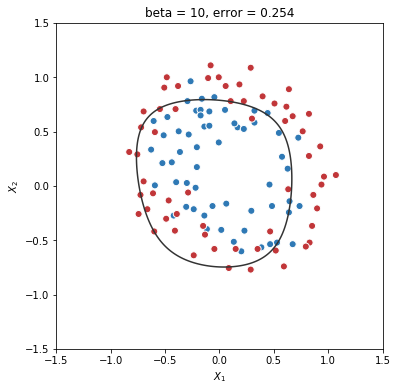

In [59]:
# make contour plot
xx, yy = np.mgrid[-1.2:1.2:.01, -1.2:1.2:.01]
xx1 = xx.ravel()
yy1 = yy.ravel()
grid = np.c_[xx1, yy1]
grid_nl = []
# re-apply feature map to inputs x1 & x2
for i in range(1, degree+1):  
	for j in range(0, i+1):
		feat = np.power(xx1, i-j) * np.power(yy1, j)
		if (len(grid_nl) > 0):
			grid_nl = np.c_[grid_nl, feat]
		else:
			grid_nl = feat
grid_nl = np.concatenate((np.ones((grid_nl.shape[0],1)),grid_nl), axis = 1)
probs = regress(grid_nl, theta).reshape(xx.shape)


f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(x1, x2, c=y2, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-1.5, 1.5), ylim=(-1.5, 1.5),
       xlabel="$X_1$", ylabel="$X_2$")
plt.title('beta = ' + str(beta) + ', error = ' + (str(err)[0:5]))
# WRITEME: write your code here to save plot to disk (look up documentation/inter-webs for matplotlib)
plt.savefig('Logi_Reg_d_'+str(degree)+'_beta_'+str(beta)+'.png', dpi = 400)
plt.show()